# **General Steps**

In [1]:
import pandas as pd
df = pd.read_csv("../clean_dataset.csv")

In [2]:
df.head()

,Unnamed: 0,target,text,num_words,num_sentence,num_characters,transformed_text
0,0,1,viiiiiiagraaaa\nonly for the ones that want to...,60,6,403,viiiiiiagraaaa one want make scream prodigi sc...
1,1,0,got ice thought look az original message ice o...,60,1,530,got ice thought look az origin messag ice oper...
2,2,1,yo ur wom an ne eds an escapenumber in ch ma n...,48,1,215,yo ur wom ne ed escapenumb ch n b e th n f h e...
3,3,1,start increasing your odds of success & live s...,69,5,345,start increas odd success live sexual healthi ...
4,4,0,author jra date escapenumber escapenumber esca...,467,1,3097,author jra date escapenumb escapenumb escapenu...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [4]:
print(df['transformed_text'].isnull().sum())

91


In [5]:
df = df.dropna(subset=['transformed_text'])

In [6]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# **1 Logistic Regression**

# **2 Linear SVC** 

Accuracy: 0.9393321635012386
Precision: 0.9303624161073826
ROC-AUC: 0.9838970157515193
R² Score: 0.7566883186562681


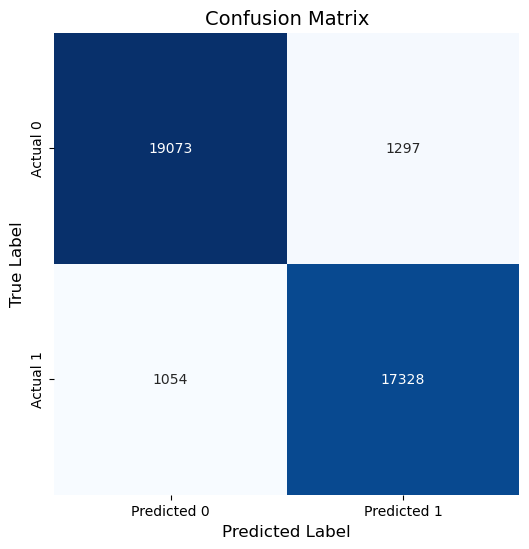

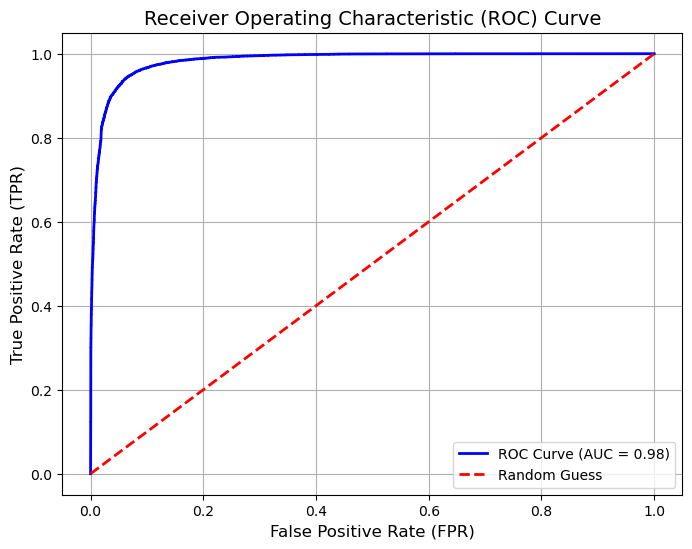

Results saved in the folder: SVC_Results


In [12]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "SVC_Results"
os.makedirs(folder_name, exist_ok=True)

# Reduce dimensionality (if needed)
svd = TruncatedSVD(n_components=100)  # Reduce to 100 components
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Initialize and train the LinearSVC model with probability calibration
svc = CalibratedClassifierCV(LinearSVC(random_state=42), method='sigmoid')
svc.fit(X_train_reduced, y_train)

# Make predictions
y_pred = svc.predict(X_test_reduced)
y_pred_prob = svc.predict_proba(X_test_reduced)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")

# **3 K Neighbour Classifier**

Accuracy: 0.9704273327828241
Precision: 0.9606585418002993
ROC-AUC: 0.9924402845049107
R² Score: 0.8813971982901248


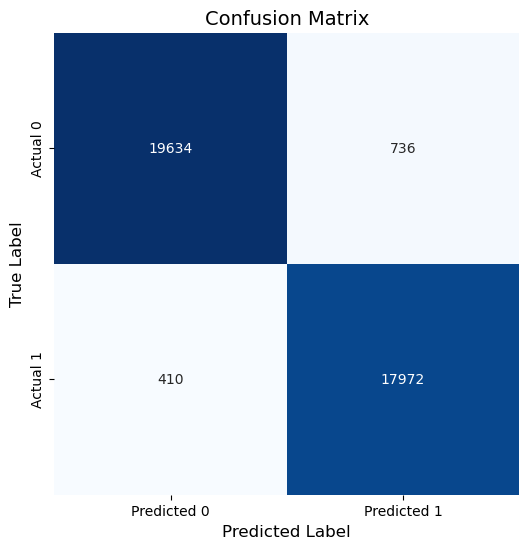

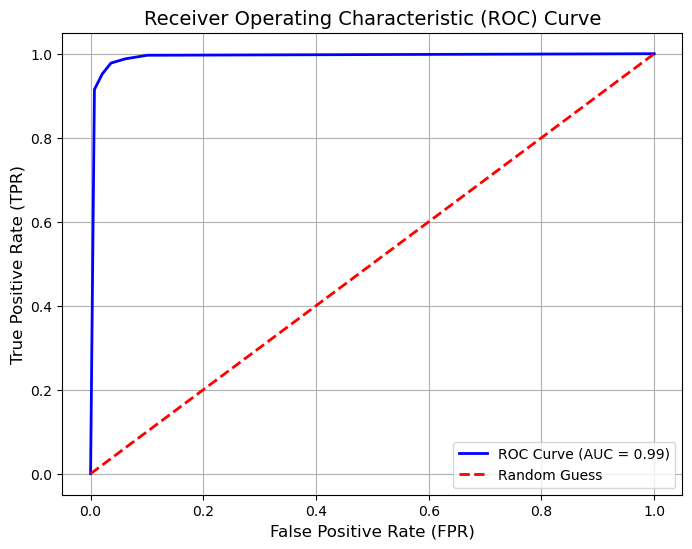

Results saved in the folder: KNN_Results


In [13]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "KNN_Results"
os.makedirs(folder_name, exist_ok=True)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_reduced, y_train)

# Make predictions
y_pred = knn.predict(X_test_reduced)
y_pred_prob = knn.predict_proba(X_test_reduced)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")

# **4 Multinomial Naive Bayes** 

Accuracy: 0.930532617671346
Precision: 0.9368526561977949
ROC-AUC: 0.9847943552386603
R² Score: 0.7213972581125792


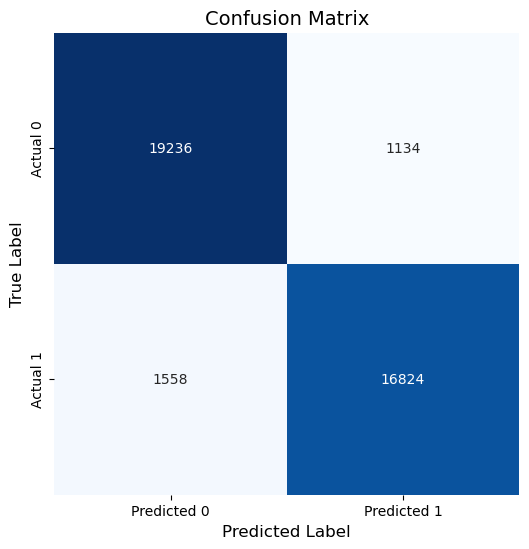

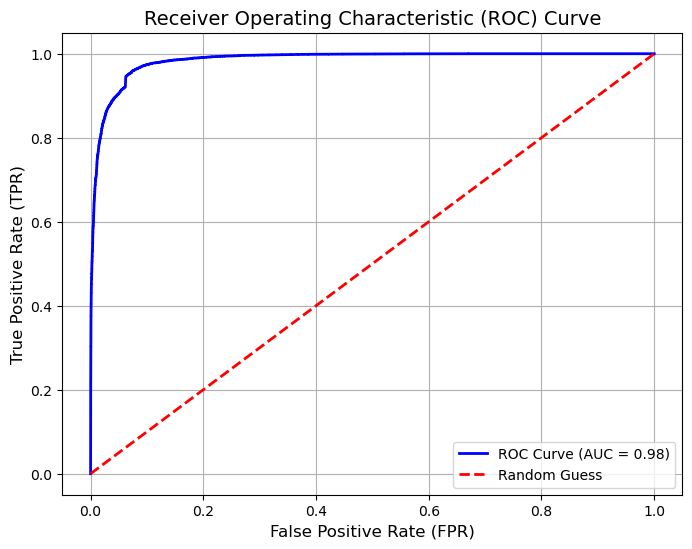

Results saved in the folder: MultinomialNB_Results


In [15]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "MultinomialNB_Results"
os.makedirs(folder_name, exist_ok=True)

# Initialize and train the MultinomialNB model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")

# **5 Decision Tree Classifier**

Accuracy: 0.9536281998348473
Precision: 0.9562585969738652
ROC-AUC: 0.9757426784125919
R² Score: 0.8140233554339914


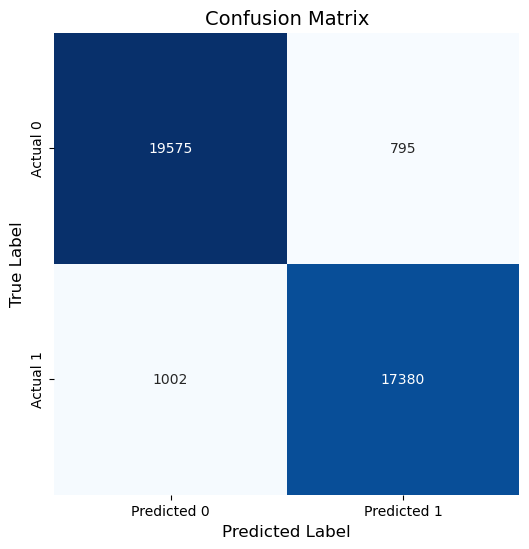

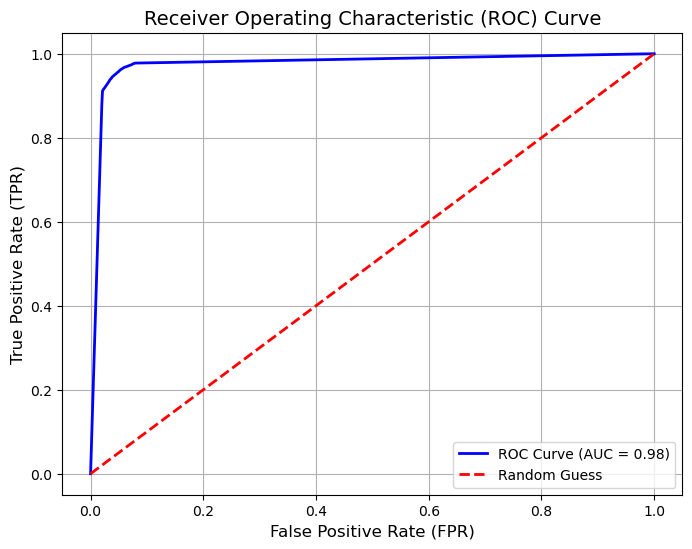

Results saved in the folder: DecisionTree_Results


In [9]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "DecisionTree_Results"
os.makedirs(folder_name, exist_ok=True)

# Initialize the Decision Tree model with the best parameters
dt = DecisionTreeClassifier(
    max_depth=None,       # No restriction on maximum depth
    min_samples_leaf=4,   # Minimum samples required in a leaf node
    min_samples_split=9,  # Minimum samples required to split an internal node
    random_state=42       # For reproducibility
)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")

Best Parameters: 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 9

# **5 Random Forest Classifier**

Accuracy: 0.9786333608587944
Precision: 0.9798797156916348
ROC-AUC: 0.9970686890501995
R² Score: 0.9143079233719226


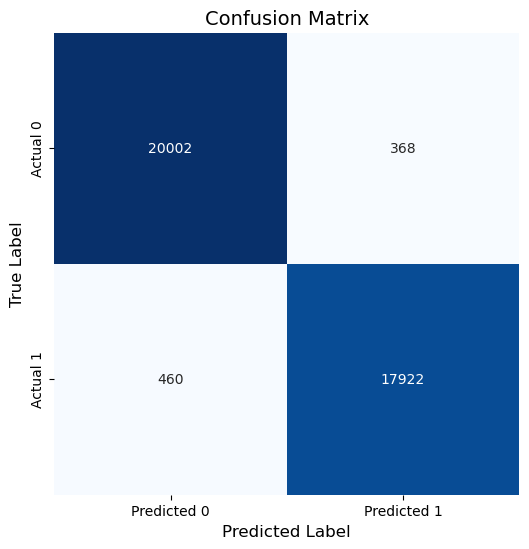

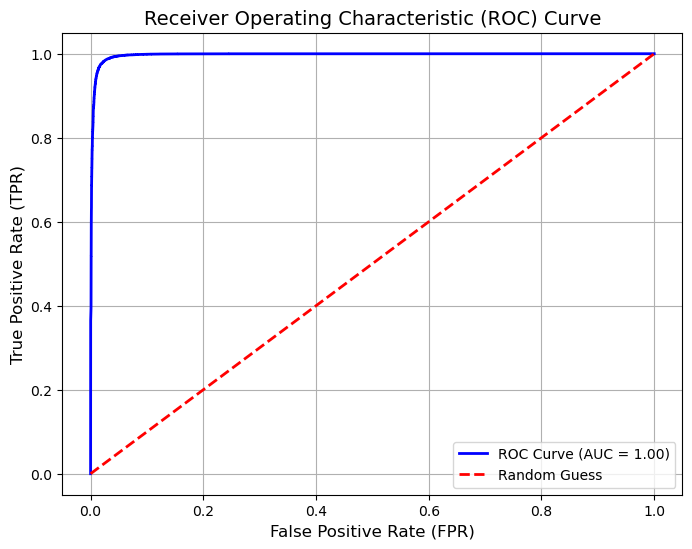

Results saved in the folder: RandomForest_Results


In [11]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "RandomForest_Results"
os.makedirs(folder_name, exist_ok=True)

# Initialize the Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,        # No restriction on maximum depth
    min_samples_leaf=4,    # Minimum samples required in a leaf node
    min_samples_split=9,   # Minimum samples required to split an internal node
    random_state=42        # For reproducibility
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")

# **6 Ada Boost Classifier**

Accuracy: 0.8489626341866227
Precision: 0.8015693448226062
ROC-AUC: 0.9216925700565008
R² Score: 0.394256371371815


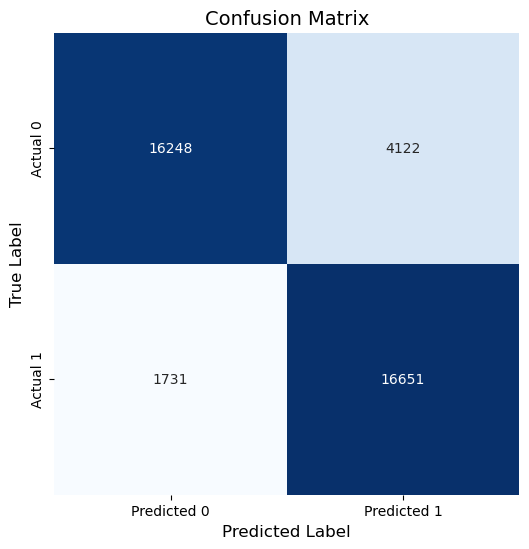

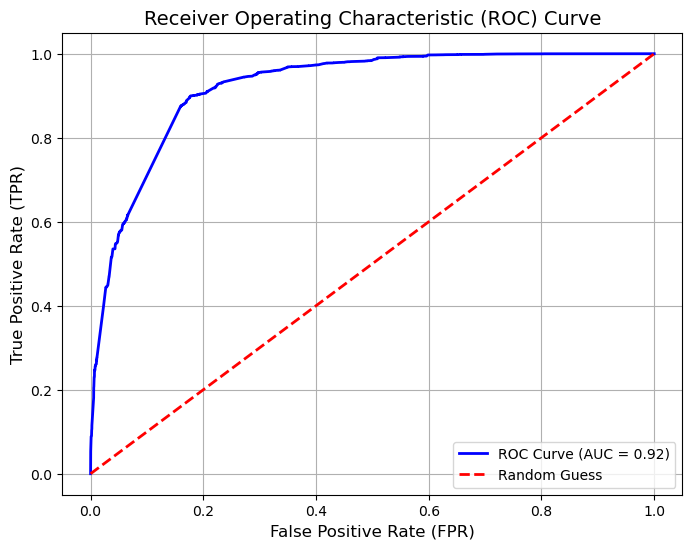

Results saved in the folder: AdaBoost_Results


In [9]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "AdaBoost_Results"
os.makedirs(folder_name, exist_ok=True)

# Initialize the AdaBoost model
adaboost = AdaBoostClassifier(
    n_estimators=50,       # Number of weak learners (default is 50)
    learning_rate=1.0,     # Weight applied to each classifier (default is 1.0)
    random_state=42        # For reproducibility
)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)
y_pred_prob = adaboost.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")

# **7 Bagging Classifier**

Training started...
Training completed!
Accuracy: 0.8936312964492156
Precision: 0.8421305182341651
Recall: 0.9547383309759547
F1-Score: 0.8949059201468563
ROC-AUC: 0.9455291021018141


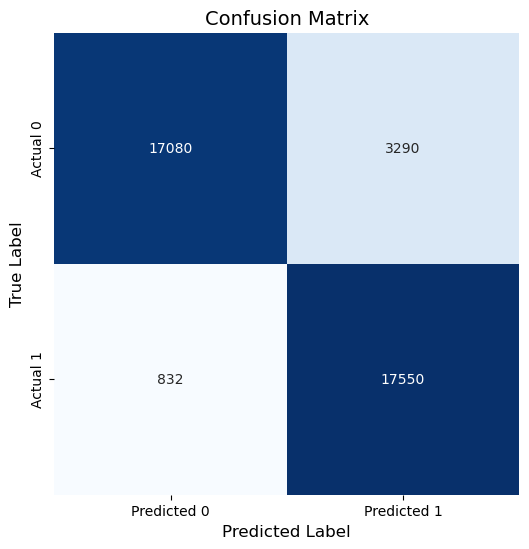

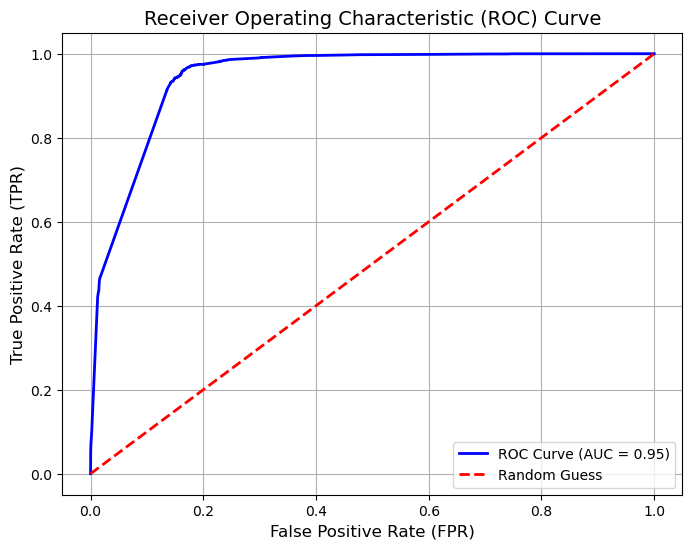

Results saved in the folder: Bagging_Results


In [8]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # Base estimator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "Bagging_Results"
os.makedirs(folder_name, exist_ok=True)

# Initialize the base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(
    max_depth=10,        # Limit the depth of the tree
    min_samples_leaf=4,  # Minimum samples required in a leaf node
    min_samples_split=9, # Minimum samples required to split an internal node
    random_state=42      # For reproducibility
)

# Initialize the Bagging model
bagging = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=10,     # Reduce the number of estimators
    random_state=42,
    n_jobs=-1            # Use all CPU cores
)

# Train the model
print("Training started...")
bagging.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred = bagging.predict(X_test)
y_pred_prob = bagging.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", auc_score)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Model: BaggingClassifier with DecisionTreeClassifier\n")
    f.write(f"Base Estimator Parameters: max_depth=10, min_samples_split=9, min_samples_leaf=4\n")
    f.write(f"Number of Estimators: 10\n")
    f.write(f"Dataset Size: {X_train.shape[0]} samples, {X_train.shape[1]} features\n")
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall: {recall}\n")
    f.write(f"F1-Score: {f1}\n")
    f.write(f"ROC-AUC: {auc_score}\n")

print(f"Results saved in the folder: {folder_name}")

# **8 Gradient Boosting Classifiere**

Training started...
      Iter       Train Loss   Remaining Time 
         1           1.3372           61.45m
         2           1.2990           60.82m
         3           1.2694           60.10m
         4           1.2391           58.83m
         5           1.2135           57.57m
         6           1.1919           56.32m
         7           1.1707           54.70m
         8           1.1508           52.89m
         9           1.1280           51.15m
        10           1.1113           49.52m
        20           0.9817           36.71m
        30           0.8992           25.31m
        40           0.8432           12.76m
        50           0.7981            0.00s
Training completed!
Accuracy: 0.8635683319570603
Precision: 0.8152231476577921
Recall: 0.9211728865194212
F1-Score: 0.8649656475876689
ROC-AUC: 0.94327941861334
R² Score: 0.45283332230356843


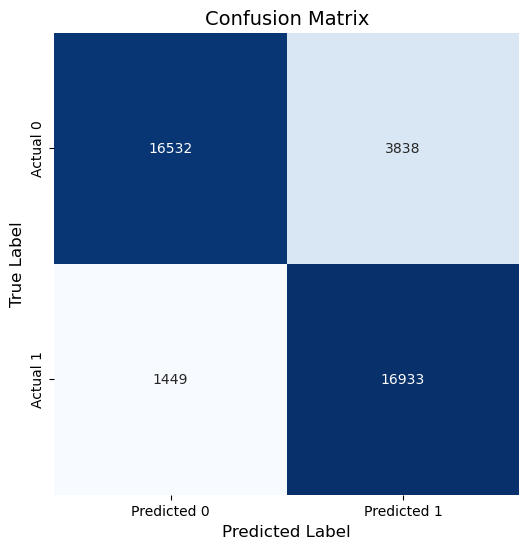

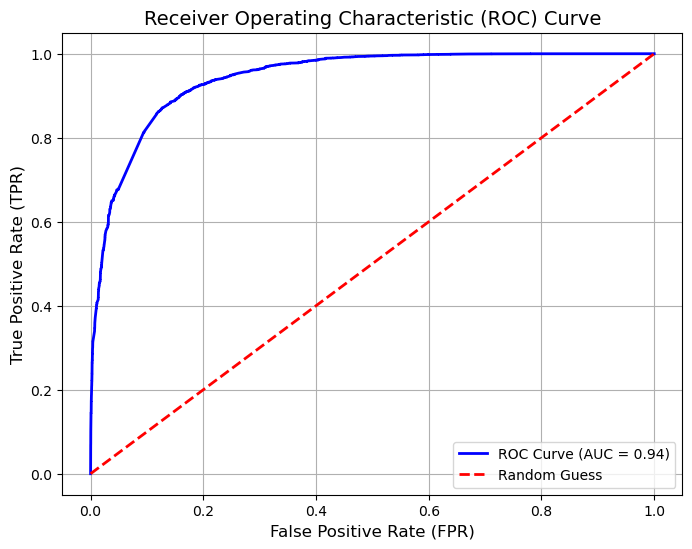

Results saved in the folder: GradientBoosting_Results


In [8]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "GradientBoosting_Results"
os.makedirs(folder_name, exist_ok=True)

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(
    n_estimators=50,          # Reduce the number of estimators
    learning_rate=0.1,
    max_depth=2,              # Reduce the maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    verbose=1                 # Enable verbose output
)

# Train the model
print("Training started...")
gb.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Model: GradientBoostingClassifier\n")
    f.write(f"Number of Estimators: 50\n")
    f.write(f"Learning Rate: 0.1\n")
    f.write(f"Max Depth: 2\n")
    f.write(f"Min Samples Split: 2\n")
    f.write(f"Min Samples Leaf: 1\n")
    f.write(f"Dataset Size: {X_train.shape[0]} samples, {X_train.shape[1]} features\n")
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall: {recall}\n")
    f.write(f"F1-Score: {f1}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")

# **9 XGBoost Classifier**